# Churn Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
%matplotlib inline

## Defining Utility function

In [2]:
# Function to get categorical column volumetric analysis
def get_volumetric(dataset, col):
    col_volumetric = dataset[col].value_counts(dropna=False).reset_index()
    col_volumetric.columns = [col, 'Volume']
    col_volumetric['%Volume'] = ((col_volumetric['Volume']*100)/col_volumetric['Volume'].sum()).round(2)
    return col_volumetric

# Function to check and get the missingValue volumetric analysis
def check_missingValue(dataset):
    null_volumetric = dataset.isnull().sum().reset_index()
    null_volumetric.columns = ['Column', 'missing value']
    null_volumetric['%missing value'] = ((null_volumetric['missing value']*100)/dataset.shape[0]).round(2)
    return null_volumetric

## Dataset Acquisition and little Wrangling

In [3]:
raw_data = pd.read_csv("Bank Customer Historic Data.csv")
print("Dataset size:")
print("Rows {} Columns {}".format(raw_data.shape[0], raw_data.shape[1]))

Dataset size:
Rows 10000 Columns 14


In [4]:
raw_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#### Checking for missing values and datatype

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
check_missingValue(raw_data)

,Column,missing value,%missing value
0,RowNumber,0,0.0
1,CustomerId,0,0.0
2,Surname,0,0.0
3,CreditScore,0,0.0
4,Geography,0,0.0
5,Gender,0,0.0
6,Age,0,0.0
7,Tenure,0,0.0
8,Balance,0,0.0
9,NumOfProducts,0,0.0


#### Checking for any duplicate observations

In [7]:
print("Total observation", raw_data.shape[0])
print("Total unique observations:", raw_data.drop_duplicates().shape[0])

Total observation 10000
Total unique observations: 10000


#### Checking CustomerId for primary identifier

In [8]:
# Getting the CustomerId volumetrics
CustomerId_v = get_volumetric(raw_data, 'CustomerId')
display(CustomerId_v.head(10))

# Check the volume is greater than 1
print("\nCustomerId having more than 1 record:", CustomerId_v[CustomerId_v['Volume']>1].shape[0])

,CustomerId,Volume,%Volume
0,15634602,1,0.01
1,15667932,1,0.01
2,15766185,1,0.01
3,15667632,1,0.01
4,15599024,1,0.01
5,15798709,1,0.01
6,15741921,1,0.01
7,15793671,1,0.01
8,15797900,1,0.01
9,15795933,1,0.01



CustomerId having more than 1 record: 0


<h2  style="color:MediumSeaGreen;">Observations:</h2><hr> 


- No Missing value is present in the dataset.


- Yes all the CustomerId have only one record present in the data (It may be primary key in the table).


- There is no duplicity in the DataSet.


- There is no abnormality  in data attributes.


- Dropping attributes as 'RowNumber' is the index, 'CustomerId' is the primary identifier and 'Surname' depicts person name.


- <b>Independent Attributes (Features) to work upon are</b>

     - Geography
     - Gender
     - Age
     - Tenure
     - Balance
     - NumOfProducts
     - HasCrCard
     - IsActiveMember
     - EstimatedSalary
    
    
- <b>Dependent Attributes (target)</b>


    - Exited

<hr>

#### Dropping 'RowNumber', 'CustomerId', 'Surname'

In [9]:
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
dataset = raw_data.drop(columns = cols_to_drop)

#### Converting datatype of 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited' to categorical (str object)

In [10]:
col_mapping = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Tenure']
for col in col_mapping:
    dataset[col] = dataset[col].astype(str)

In [11]:
# Dataset to work upon
display(dataset.info())

dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


None

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
# Creating column's subsets as per the datatype
dataset_dtypes = dataset.dtypes.reset_index()
dataset_dtypes.columns = ['variable', 'dtype']
# Getting the categorical columns
cat_cols = dataset_dtypes[dataset_dtypes['dtype']=='object']['variable'].tolist()
cat_cols.remove('Exited')
# Getting the continuos columns
cont_cols = dataset_dtypes[dataset_dtypes['dtype']!='object']['variable'].tolist()

print("Categorical Features:", cat_cols)
print()
print("Continuos Features:", cont_cols)
print()
print("Target Feature:", 'Exited')

Categorical Features: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

Continuos Features: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

Target Feature: Exited


<hr>

##  Exploratory Data Analysis

#### Target Attribute Distribution - Exited

,Exited,Volume,%Volume
0,0,7963,79.63
1,1,2037,20.37


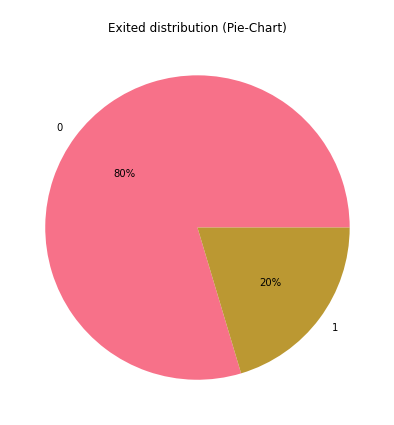

In [13]:
# Getting the Exited class distribution 
target_volumetric =  get_volumetric(dataset, 'Exited')
display(target_volumetric)

# Plotting a pie chart
colors = sns.color_palette('husl')
plt.figure(figsize=(7,7))
plt.title("\nExited distribution (Pie-Chart)")
plt.pie(target_volumetric['%Volume'], 
        labels = target_volumetric['Exited'], 
        colors = colors, autopct='%.0f%%')
plt.show();

<h4  style="color:MediumSeaGreen;">Observations:</h4><hr> 

- Exited have imbalanced distirbution

#### Categorical  Attributes (Features)

In [14]:
# Descriptive statistics on Categorical Attributes (Features)
dataset[cat_cols].describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151


In [15]:
# Getting the category volume distribution and cardinality
for col in cat_cols:
    cat_v = get_volumetric(dataset, col)
    print(f"{col} - Cardinality:{cat_v.shape[0]}")
    display(cat_v)
    print()

Geography - Cardinality:3


,Geography,Volume,%Volume
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77



Gender - Cardinality:2


,Gender,Volume,%Volume
0,Male,5457,54.57
1,Female,4543,45.43



Tenure - Cardinality:11


,Tenure,Volume,%Volume
0,2,1048,10.48
1,1,1035,10.35
2,7,1028,10.28
3,8,1025,10.25
4,5,1012,10.12
5,3,1009,10.09
6,4,989,9.89
7,9,984,9.84
8,6,967,9.67
9,10,490,4.90



NumOfProducts - Cardinality:4


,NumOfProducts,Volume,%Volume
0,1,5084,50.84
1,2,4590,45.90
2,3,266,2.66
3,4,60,0.60



HasCrCard - Cardinality:2


,HasCrCard,Volume,%Volume
0,1,7055,70.55
1,0,2945,29.45



IsActiveMember - Cardinality:2


,IsActiveMember,Volume,%Volume
0,1,5151,51.51
1,0,4849,48.49


<h4  style="color:MediumSeaGreen;">Observations:</h4><hr> 


- 'Gender' and 'IsActiveMember' have balanced distribution.

- 'NumOfProducts' is a Ordinal.

#### Bi-Variate EDA on Categorical Attributes (Fetaures) w.r.t Exited

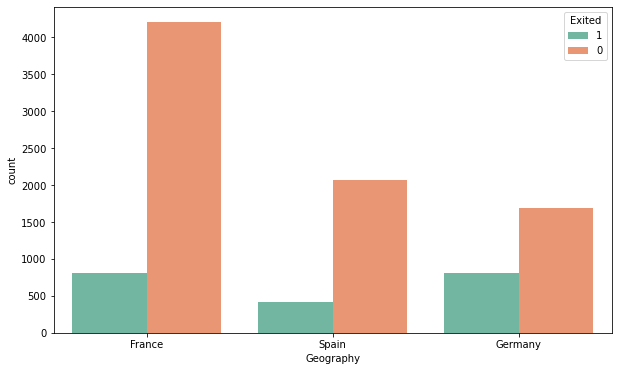

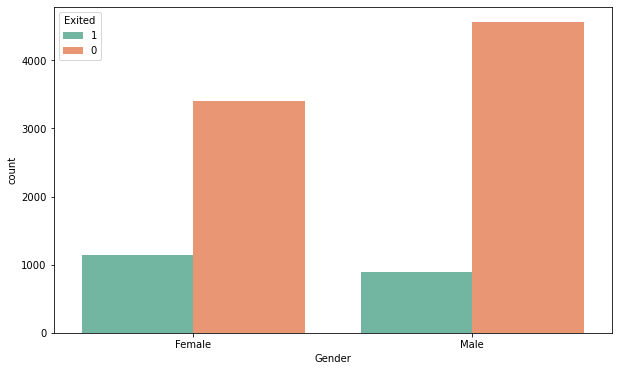

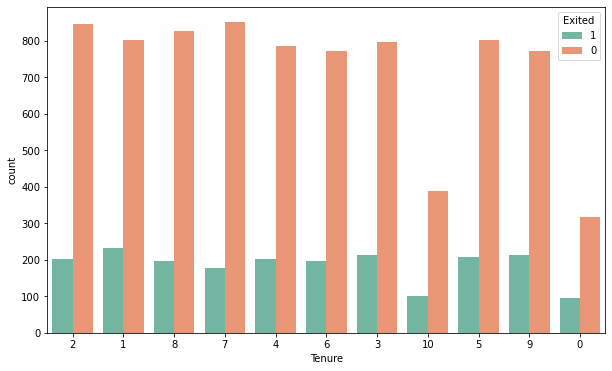

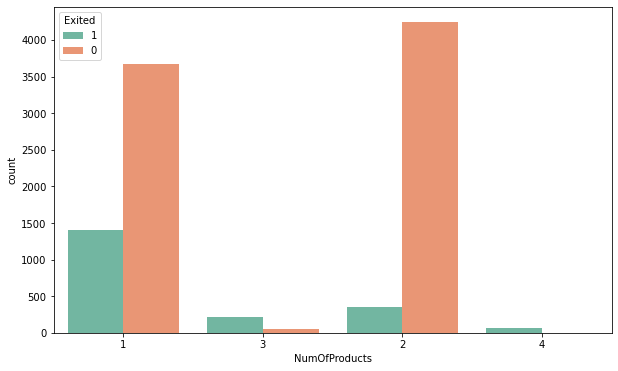

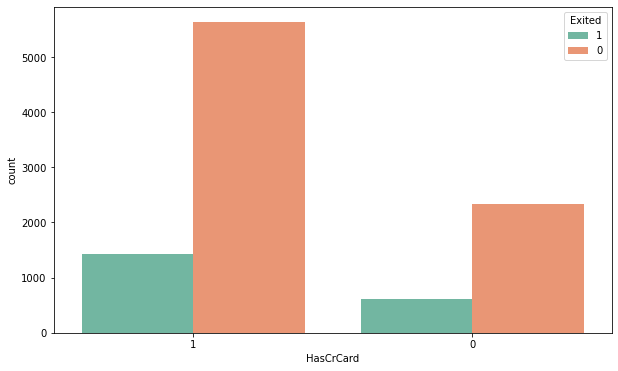

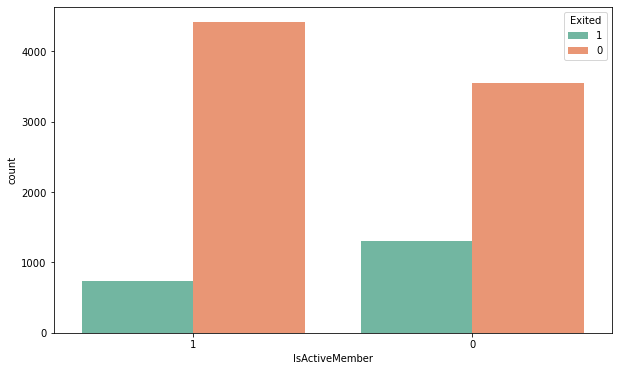

In [16]:
# Cross table plot
for col in cat_cols:
    fig = plt.figure(figsize=(10, 6));
    ax = fig.gca();0
    sns.countplot(x=col, hue="Exited", data=dataset, palette="Set2", ax = ax)

In [17]:
# Contingency table volumetric
for col in cat_cols:
    cross_v = dataset.groupby('Exited').apply(lambda x: get_volumetric(x, col))
    print(f"{col} - Contingency table")
    display(cross_v)

Geography - Contingency table


Geography  Volume  %Volume
Exited                             
0      0    France    4204    52.79
       1     Spain    2064    25.92
       2   Germany    1695    21.29
1      0   Germany     814    39.96
       1    France     810    39.76
       2     Spain     413    20.27

Gender - Contingency table


Gender  Volume  %Volume
Exited                           
0      0    Male    4559    57.25
       1  Female    3404    42.75
1      0  Female    1139    55.92
       1    Male     898    44.08

Tenure - Contingency table


Tenure  Volume  %Volume
Exited                           
0      0       7     851    10.69
       1       2     847    10.64
       2       8     828    10.40
       3       1     803    10.08
       4       5     803    10.08
       5       3     796    10.00
       6       4     786     9.87
       7       6     771     9.68
       8       9     771     9.68
       9      10     389     4.89
       10      0     318     3.99
1      0       1     232    11.39
       1       3     213    10.46
       2       9     213    10.46
       3       5     209    10.26
       4       4     203     9.97
       5       2     201     9.87
       6       8     197     9.67
       7       6     196     9.62
       8       7     177     8.69
       9      10     101     4.96
       10      0      95     4.66

NumOfProducts - Contingency table


NumOfProducts  Volume  %Volume
Exited                                 
0      0             2    4242    53.27
       1             1    3675    46.15
       2             3      46     0.58
1      0             1    1409    69.17
       1             2     348    17.08
       2             3     220    10.80
       3             4      60     2.95

HasCrCard - Contingency table


HasCrCard  Volume  %Volume
Exited                             
0      0         1    5631    70.71
       1         0    2332    29.29
1      0         1    1424    69.91
       1         0     613    30.09

IsActiveMember - Contingency table


IsActiveMember  Volume  %Volume
Exited                                  
0      0              1    4416    55.46
       1              0    3547    44.54
1      0              0    1302    63.92
       1              1     735    36.08

#### Continuos Attributes (Features)

In [18]:
# Descriptive statistics on Continuos Attributes (Features)
dataset[cont_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


#### Bi-Variate EDA on Continuos Attributes (Features) w.r.t to Exited

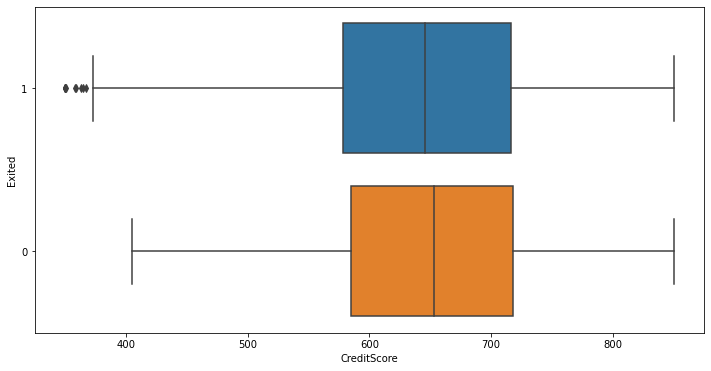

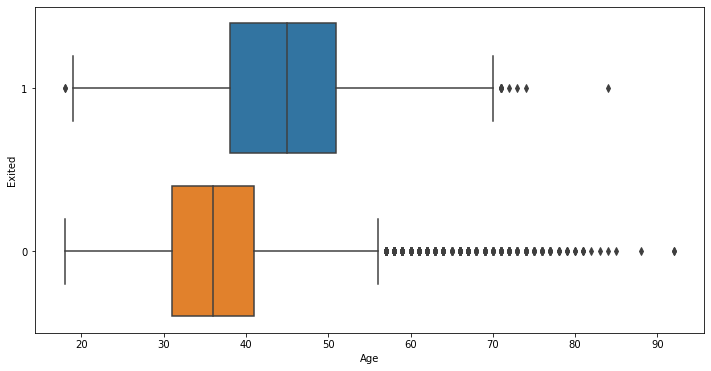

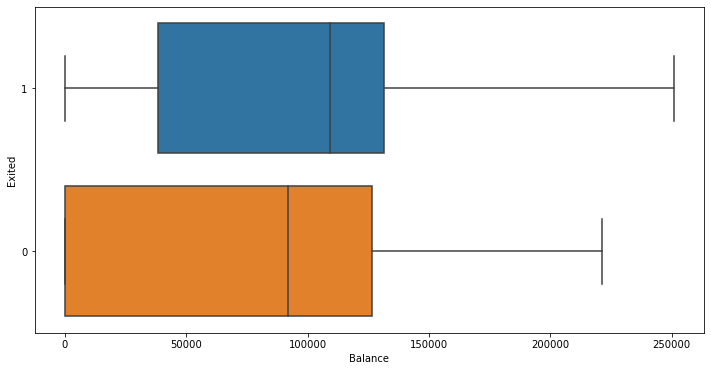

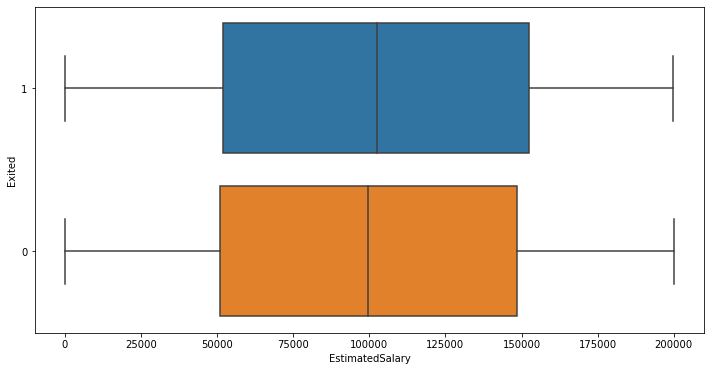

In [19]:
for col in cont_cols:
    fig = plt.figure(figsize=(12, 6));
    ax = fig.gca();0
    sns.boxplot( x = col, y = 'Exited', data=dataset, ax = ax);

#### Multivariate EDA on Continuos Attributes (Features) w.r.t to Exited

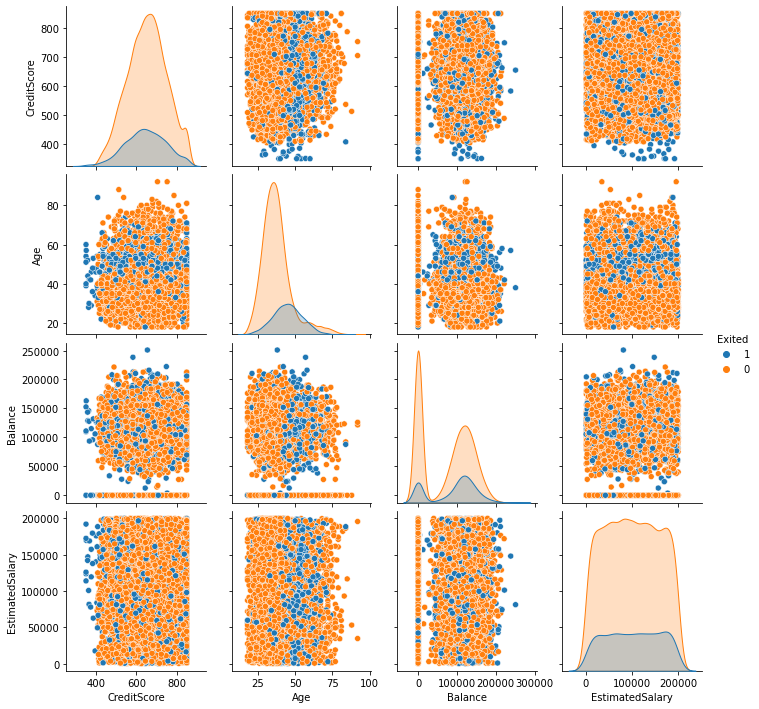

In [20]:
# Ploting a pairplot to understand multi-variate relationship b/w continuos variable with hue on "Exited"
sns.pairplot(dataset[cont_cols + ['Exited']], hue = 'Exited');

#### Correlation between continuos attributes

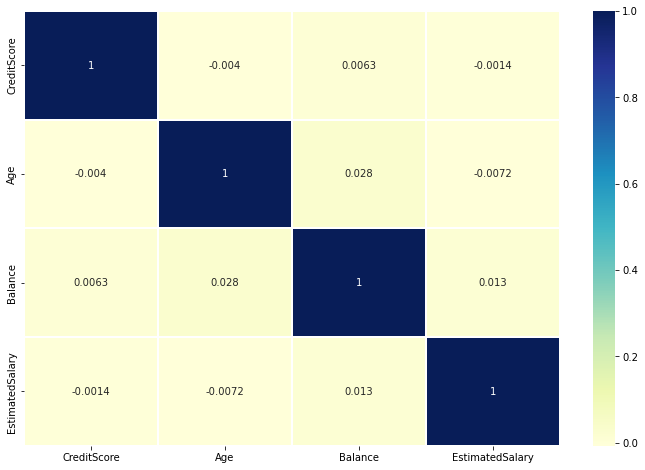

In [21]:
fig = plt.figure(figsize=(12, 8));
sns.heatmap(dataset[cont_cols].corr(), cmap="YlGnBu",  annot=True, linewidths ='.02');

## Data Processing

In [22]:
# Working on a copy
data_tw = dataset.copy()
data_tw.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Continuos Feature Set

#### Applying StandardScaler

In [23]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [24]:
data_tw

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
box_cox_features = data_tw[cont_cols]

# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler_tx = scaler.fit_transform(box_cox_features)

# Creating a feature set for Continuos dataset
cont_df_tx = pd.DataFrame(scaler_tx, columns = cont_cols)

cont_df_tx.head()

,CreditScore,Age,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.225848,0.021886
1,-0.440036,0.198164,0.117350,0.216534
2,-1.536794,0.293517,1.333053,0.240687
3,0.501521,0.007457,-1.225848,-0.108918
4,2.063884,0.388871,0.785728,-0.365276


### Categorical Feature Set

#### Applying one hot encoding

In [26]:
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [27]:
cat_df_tx = pd.get_dummies(data_tw[cat_cols], 
                            prefix = cat_cols, 
                            drop_first = True)

In [28]:
cat_df_tx.head()

,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_10,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


### Merging Catogircal and Continous Transformed dataset

In [29]:
df_tx = pd.concat([cat_df_tx, cont_df_tx], axis = 1)

In [30]:
df_tx

,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_10,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,...,Tenure_9,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,CreditScore,Age,Balance,EstimatedSalary
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,-0.326221,0.293517,-1.225848,0.021886
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,-0.440036,0.198164,0.117350,0.216534
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,-1.536794,0.293517,1.333053,0.240687
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.501521,0.007457,-1.225848,-0.108918
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,2.063884,0.388871,0.785728,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1.246488,0.007457,-1.225848,-0.066419
9996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,-1.391939,-0.373958,-0.306379,0.027988
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.604988,-0.278604,-1.225848,-1.008643
9998,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1.256835,0.293517,-0.022608,-0.125231


## Baseline Modelling

In [31]:
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# Model interpretation
import shap

In [32]:
X = df_tx
y = data_tw['Exited'].astype(int)

print(f"Dataset Shape:\n\nX -> {X.shape}\ny -> {y.shape}")


# Keeping 20% of the data aside for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=2020)

print(f"\nTrain-Test Shape:\n \nX_train -> {X_train.shape} \t y_train -> {y_train.shape} \nX_test ->  {X_test.shape} \t y_test -> {y_test.shape}")

Dataset Shape:

X -> (10000, 22)
y -> (10000,)

Train-Test Shape:
 
X_train -> (8000, 22) 	 y_train -> (8000,) 
X_test ->  (2000, 22) 	 y_test -> (2000,)


### DecisionTreeClassifier - 6 fold Cross Validation

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
params = {
          'max_depth':[7, 9, 15, 17], 
          'class_weight': [None, "balanced", {0:1,1:3}, {0:1,1:5}]
         }

clf = DecisionTreeClassifier(random_state=20)

In [35]:
gs_rfc = GridSearchCV(clf, 
                      params, 
                      scoring='f1', 
                      n_jobs=-1, 
                      verbose=3,
                      cv=6)
gs_rfc.fit(X_train, y_train)

print("Best set of Parameters", gs_rfc.best_params_)
print("Best Score", gs_rfc.best_score_)

Fitting 6 folds for each of 16 candidates, totalling 96 fits
Best set of Parameters {'class_weight': {0: 1, 1: 3}, 'max_depth': 7}
Best Score 0.5685839041060469


In [36]:
# USing the optimal hyperparameters and training the classifier on TRAIN set
best_rfc = DecisionTreeClassifier(max_depth=7, random_state = 20)
best_rfc.fit(X_train, y_train)

print("\t\t********* DecisionTreeClassifier  ***********\n")
print("\t********* Train Set *********** \n")
# Making prediction on Hold-out train set
y_pred_rfc = best_rfc.predict(X_train)

# Classification Report on Hold-out train set
print("*Classification Report **\n")
print(classification_report(y_train, y_pred_rfc))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_train, y_pred_rfc))

print("\n\t********* Test Set *********** \n")

# Making prediction on Hold-out test set
y_pred_rfc = best_rfc.predict(X_test)

# Classification Report on Hold-out test set
print("**Classification Report **\n")
print(classification_report(y_test, y_pred_rfc))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_test, y_pred_rfc))

		********* DecisionTreeClassifier  ***********

	********* Train Set *********** 

*Classification Report **

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      6382
           1       0.80      0.51      0.62      1618

    accuracy                           0.87      8000
   macro avg       0.84      0.74      0.77      8000
weighted avg       0.87      0.87      0.86      8000

**F1 score **

0.6210804684548545

	********* Test Set *********** 

**Classification Report **

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1581
           1       0.76      0.43      0.55       419

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000

**F1 score **

0.5465648854961831


### KNeighborsClassifier - 6 fold Cross Validation

In [37]:
from sklearn.neighbors import KNeighborsClassifier 

In [38]:
params = {
          'n_neighbors': range(2,12),
          'algorithm': ['auto', 'kd_tree', 'brute'],
          'weights': [None, "balanced", {0:1,1:3}, {0:1,1:1.5}]
         }

clf = KNeighborsClassifier()

gs_knn = GridSearchCV(clf, 
                      params, 
                      scoring='f1', 
                      n_jobs=-1, 
                      verbose=10,
                      cv=6)

gs_knn.fit(X_train, y_train)

print("Best set of Parameters", gs_knn.best_params_)
print("Best Score", gs_knn.best_score_)

Fitting 6 folds for each of 120 candidates, totalling 720 fits
Best set of Parameters {'algorithm': 'auto', 'n_neighbors': 3, 'weights': None}
Best Score 0.44428374440156043



540 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 82, in _check_weights
    raise ValueError(
ValueError: weights not recognized: should be 'uniform', 'distance', or a callable function

One or more of the test scores a

In [39]:
# USing the optimal hyperparameters and training the classifier on TRAIN set
best_knn = KNeighborsClassifier(n_neighbors=11, weights=None)
best_knn.fit(X_train, y_train)

print("\t\t********* KNeighborsClassifier  ***********\n")
print("\t********* Train Set *********** \n")
# Making prediction on Hold-out train set
y_pred_knn = best_knn.predict(X_train)

# Classification Report on Hold-out train set
print("*Classification Report **\n")
print(classification_report(y_train, y_pred_knn))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_train, y_pred_knn))

print("\n\t********* Test Set *********** \n")

# Making prediction on Hold-out test set
y_pred_knn = best_knn.predict(X_test)

# Classification Report on Hold-out test set
print("**Classification Report **\n")
print(classification_report(y_test, y_pred_knn))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_test, y_pred_knn))

		********* KNeighborsClassifier  ***********

	********* Train Set *********** 

*Classification Report **

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6382
           1       0.81      0.36      0.50      1618

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.70      8000
weighted avg       0.85      0.85      0.83      8000

**F1 score **

0.49593147751606

	********* Test Set *********** 

**Classification Report **

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1581
           1       0.70      0.30      0.42       419

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000

**F1 score **

0.4180602006688963


### Oversampling the minority "1" class

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE(random_state = 20)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train.ravel())

In [42]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}\n".format(sum(y_train_sm == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

Before OverSampling, counts of label '1': 1618
Before OverSampling, counts of label '0': 6382 

After OverSampling, counts of label '1': 6382
After OverSampling, counts of label '0': 6382

After OverSampling, the shape of train_X: (12764, 22)
After OverSampling, the shape of train_y: (12764,) 



In [43]:
params = {
          'max_depth':[7, 9, 15, 17], 
          'class_weight': [None, "balanced", {0:1,1:3}, {0:1,1:5}]
         }

clf = DecisionTreeClassifier(random_state=20)

gs_rfc = GridSearchCV(clf, 
                      params, 
                      scoring='f1', 
                      n_jobs=-1, 
                      verbose=3,
                      cv=6)
gs_rfc.fit(X_train_sm, y_train_sm)

print("Best set of Parameters", gs_rfc.best_params_)
print("Best Score", gs_rfc.best_score_)

Fitting 6 folds for each of 16 candidates, totalling 96 fits
Best set of Parameters {'class_weight': {0: 1, 1: 3}, 'max_depth': 17}
Best Score 0.829649156353045


In [44]:
best_rfc_sm = DecisionTreeClassifier(max_depth=17, class_weight = {0: 1, 1: 3}, random_state=20)
best_rfc_sm.fit(X_train_sm, y_train_sm)

print("\t\t********* DecisionTreeClassifier after SMOTE  ***********\n")
print("\t********* Train Set *********** \n")
# Making prediction on Hold-out train set
y_pred_rfc_sm = best_rfc_sm.predict(X_train_sm)

# Classification Report on Hold-out train set
print("*Classification Report **\n")
print(classification_report(y_train_sm, y_pred_rfc_sm))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_train_sm, y_pred_rfc_sm))

print("\n\t********* Test Set *********** \n")

# Making prediction on Hold-out test set
y_pred_rfc_sm = best_rfc_sm.predict(X_test)

# Classification Report on Hold-out test set
print("**Classification Report **\n")
print(classification_report(y_test, y_pred_rfc_sm))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_test, y_pred_rfc_sm))

		********* DecisionTreeClassifier after SMOTE  ***********

	********* Train Set *********** 

*Classification Report **

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      6382
           1       0.93      1.00      0.96      6382

    accuracy                           0.96     12764
   macro avg       0.96      0.96      0.96     12764
weighted avg       0.96      0.96      0.96     12764

**F1 score **

0.9630021141649048

	********* Test Set *********** 

**Classification Report **

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1581
           1       0.40      0.55      0.46       419

    accuracy                           0.73      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.77      0.73      0.75      2000

**F1 score **

0.46399999999999997


### SHAP Importance

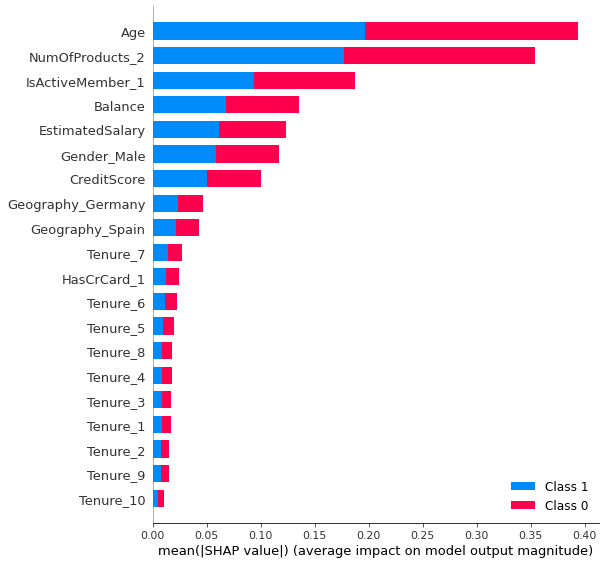

In [45]:
explainer = shap.TreeExplainer(best_rfc_sm)
shap_values = explainer.shap_values(X_test)

shap.initjs()

shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type ='bar')

#### Fetaure Importance Decision Tree

In [46]:
importance_df = pd.DataFrame()
importance_df['Features'] = best_rfc_sm.feature_names_in_
importance_df['Features Importance'] = best_rfc_sm.feature_importances_
importance_df.sort_values(by = 'Features Importance', ascending = False)

,Features,Features Importance
13,NumOfProducts_2,0.217031
19,Age,0.207097
21,EstimatedSalary,0.115185
18,CreditScore,0.113938
20,Balance,0.112393
17,IsActiveMember_1,0.043787
2,Gender_Male,0.030939
1,Geography_Spain,0.016734
10,Tenure_7,0.015503
0,Geography_Germany,0.015112


<h3  style="color:MediumSeaGreen;">Observations:</h3><hr> 

- DecisionTreeClassifier with SMOTE has the highest accuracy numbers (relatively). The model is overfitting on TRAIN-TEST set but gives <b>good fit on 6-fold CV (.82 F1-Score)</b> (relatively). Tree based model is generalizing the dataset better therefore can go ahead with <b>Ensemble Boosting Classifier</b> like XgBoost.

## Finalizing Modelling with Xgboost

In [47]:
import xgboost as xgb

In [48]:
X = df_tx
y = data_tw['Exited'].astype(int)

print(f"Dataset Shape:\n\nX -> {X.shape}\ny -> {y.shape}")

# Applying minotiry class Oversampling using SMOTE
smote = SMOTE(random_state = 20)
X_sm, y_sm = smote.fit_resample(X, y.ravel())

print(f"\nDataset Shape After SMOTE:\n\nX -> {X_sm.shape}\ny -> {y_sm.shape}")

# Keeping 20% of the data aside for testing
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = .20, random_state=2020)

print(f"\nTrain-Test Shape:\n \nX_train -> {X_train.shape} \t y_train -> {y_train.shape} \nX_test ->  {X_test.shape} \t y_test -> {y_test.shape}")

Dataset Shape:

X -> (10000, 22)
y -> (10000,)

Dataset Shape After SMOTE:

X -> (15926, 22)
y -> (15926,)

Train-Test Shape:
 
X_train -> (12740, 22) 	 y_train -> (12740,) 
X_test ->  (3186, 22) 	 y_test -> (3186,)


In [49]:
xgb_clf = xgb.XGBClassifier(base_score=0.5, 
                            use_label_encoder=False,
                            booster='gbtree',  
                            learning_rate=0.300000012,
                            max_depth=6, 
                            min_child_weight=1, 
                            n_estimators=200, 
                            n_jobs=8,
                            verbosity=None
                           )
xgb_clf.fit(X_train, 
            y_train,
            eval_set = [(X_train, y_train), (X_test, y_test)],
            eval_metric = 'logloss',
            verbose = 0
           )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Performance Results 

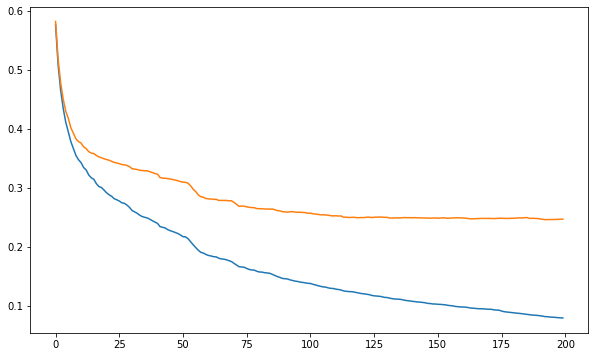

In [50]:
results = xgb_clf.evals_result()
# PLotting learning curve
plt.figure(figsize=(10,6))
plt.plot(results['validation_0']['logloss'], label = 'train')
plt.plot(results['validation_1']['logloss'], label = 'test')
plt.show();

In [51]:
print("\t\t********* XGBClassifier ***********\n")
print("\t********* TRAIN SET *********** \n")
# Making prediction on Hold-out TRAIN set
y_pred_xgb = xgb_clf.predict(X_train)

# Classification Report on Hold-out TRAIN set
print("*Classification Report **\n")
print(classification_report(y_train, y_pred_xgb))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_train, y_pred_xgb))

print("\n\t********* TEST SET *********** \n")

# Making prediction on Hold-out TEST set
y_pred_xgb = xgb_clf.predict(X_test)

# Classification Report on Hold-out TEST set
print("**Classification Report **\n")
print(classification_report(y_test, y_pred_xgb))

# F1 Score
print("**F1 score **\n")
print(f1_score(y_test, y_pred_xgb))

		********* XGBClassifier ***********

	********* TRAIN SET *********** 

*Classification Report **

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6386
           1       1.00      0.98      0.99      6354

    accuracy                           0.99     12740
   macro avg       0.99      0.99      0.99     12740
weighted avg       0.99      0.99      0.99     12740

**F1 score **

0.9877130400317082

	********* TEST SET *********** 

**Classification Report **

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1577
           1       0.91      0.90      0.91      1609

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186

**F1 score **

0.9057312871907297


### Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
from IPython.display import display

,Not Exited,Exited
Not Exited,1439,138
Exited,163,1446


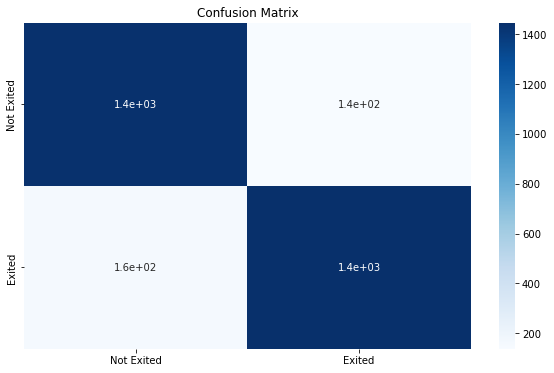

In [53]:
# Test Set
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
df_cm = pd.DataFrame(cf_matrix, 
                     index = [ 'Not Exited', 'Exited'],
                     columns = [ 'Not Exited', 'Exited'])
display(df_cm)

plt.figure(figsize=(10,6))

res = sns.heatmap(df_cm.astype(int), annot=True, cmap='Blues')

plt.title('Confusion Matrix');

### Summary Plot

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


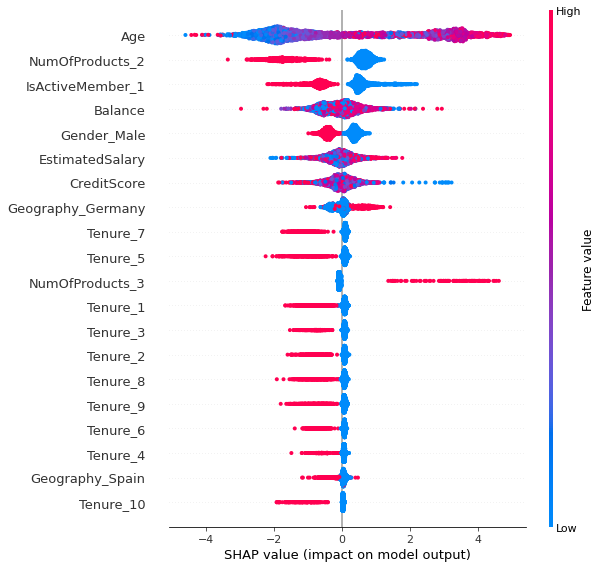

In [54]:
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

### XGBoost Feature Importance

In [55]:
importance_df = pd.DataFrame()
importance_df['Features'] = X_train.columns
importance_df['Features Importance'] = xgb_clf.feature_importances_
importance_df.sort_values(by = 'Features Importance', ascending = False)

,Features,Features Importance
13,NumOfProducts_2,0.368944
17,IsActiveMember_1,0.068354
19,Age,0.052421
14,NumOfProducts_3,0.050171
4,Tenure_10,0.042682
15,NumOfProducts_4,0.039672
2,Gender_Male,0.033398
10,Tenure_7,0.033084
5,Tenure_2,0.030192
0,Geography_Germany,0.029082


<h2  style="color:MediumSeaGreen;">Conslusion:</h2><hr> 

- The XgBoost Classifier with SMOTE performed well in generalizing the dataset. The train set achieved an F1-score of 987, whereas the test set achieved an F1-score of.905.


- We can also use Recall as an import metric and by keeping a low classification threshold we can get a substantially high 
score. 


- It is critical to highlight that discovering patterns in Exploratory Data Analysis (EDA) is just as significant as making the final forecast.

## Model for prediction in Production*

In [56]:
xgb_prd = xgb.XGBClassifier(base_score=0.5, 
                            use_label_encoder=False,
                            booster='gbtree',  
                            learning_rate=0.300000012,
                            max_depth=6, 
                            min_child_weight=1, 
                            n_estimators=200, 
                            n_jobs=8,
                            verbosity=None
                           )
xgb_prd.fit(X,
            y,
            verbose = 1
           )

[19:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [57]:
xgb_prd.save_model("xgb_prd_churn.json")